In [0]:
import numpy as np
import tensorflow as tf
from tensorflow_probability import distributions
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.neural_network import BernoulliRBM
from tqdm import tqdm

In [0]:
import IPython
from IPython.display import Image

# **Part 1**

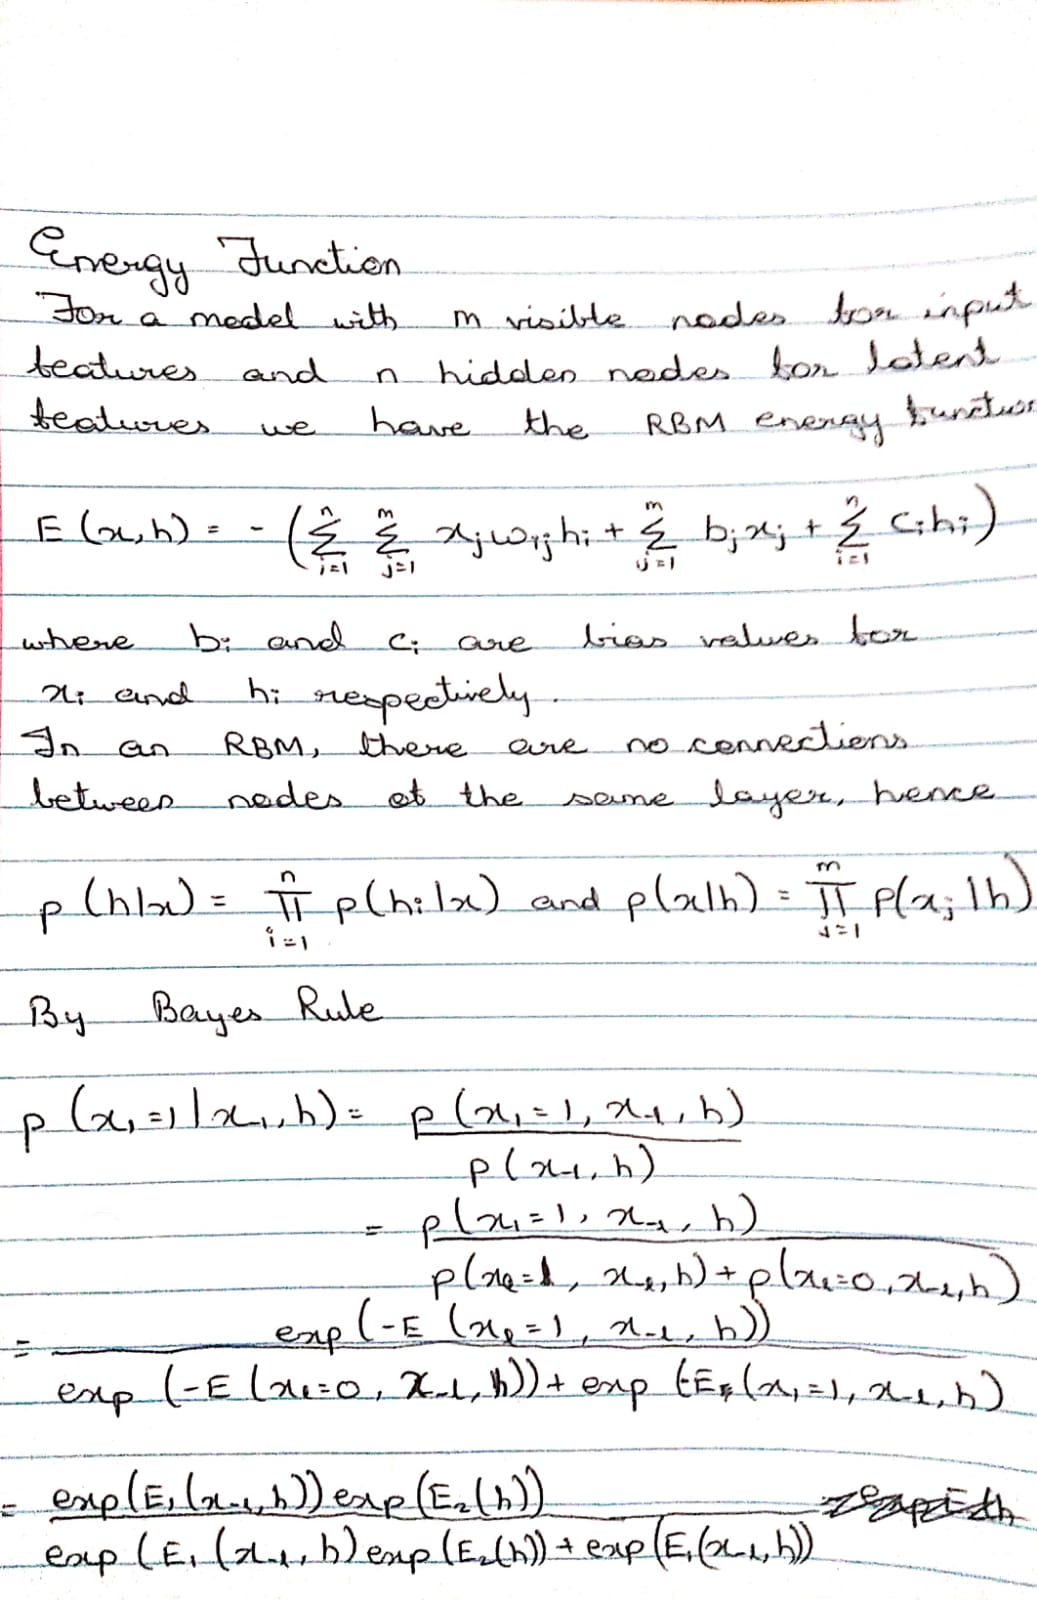

In [0]:
Image(filename = 'PS5-1.jpeg', width = 500, height = 500)

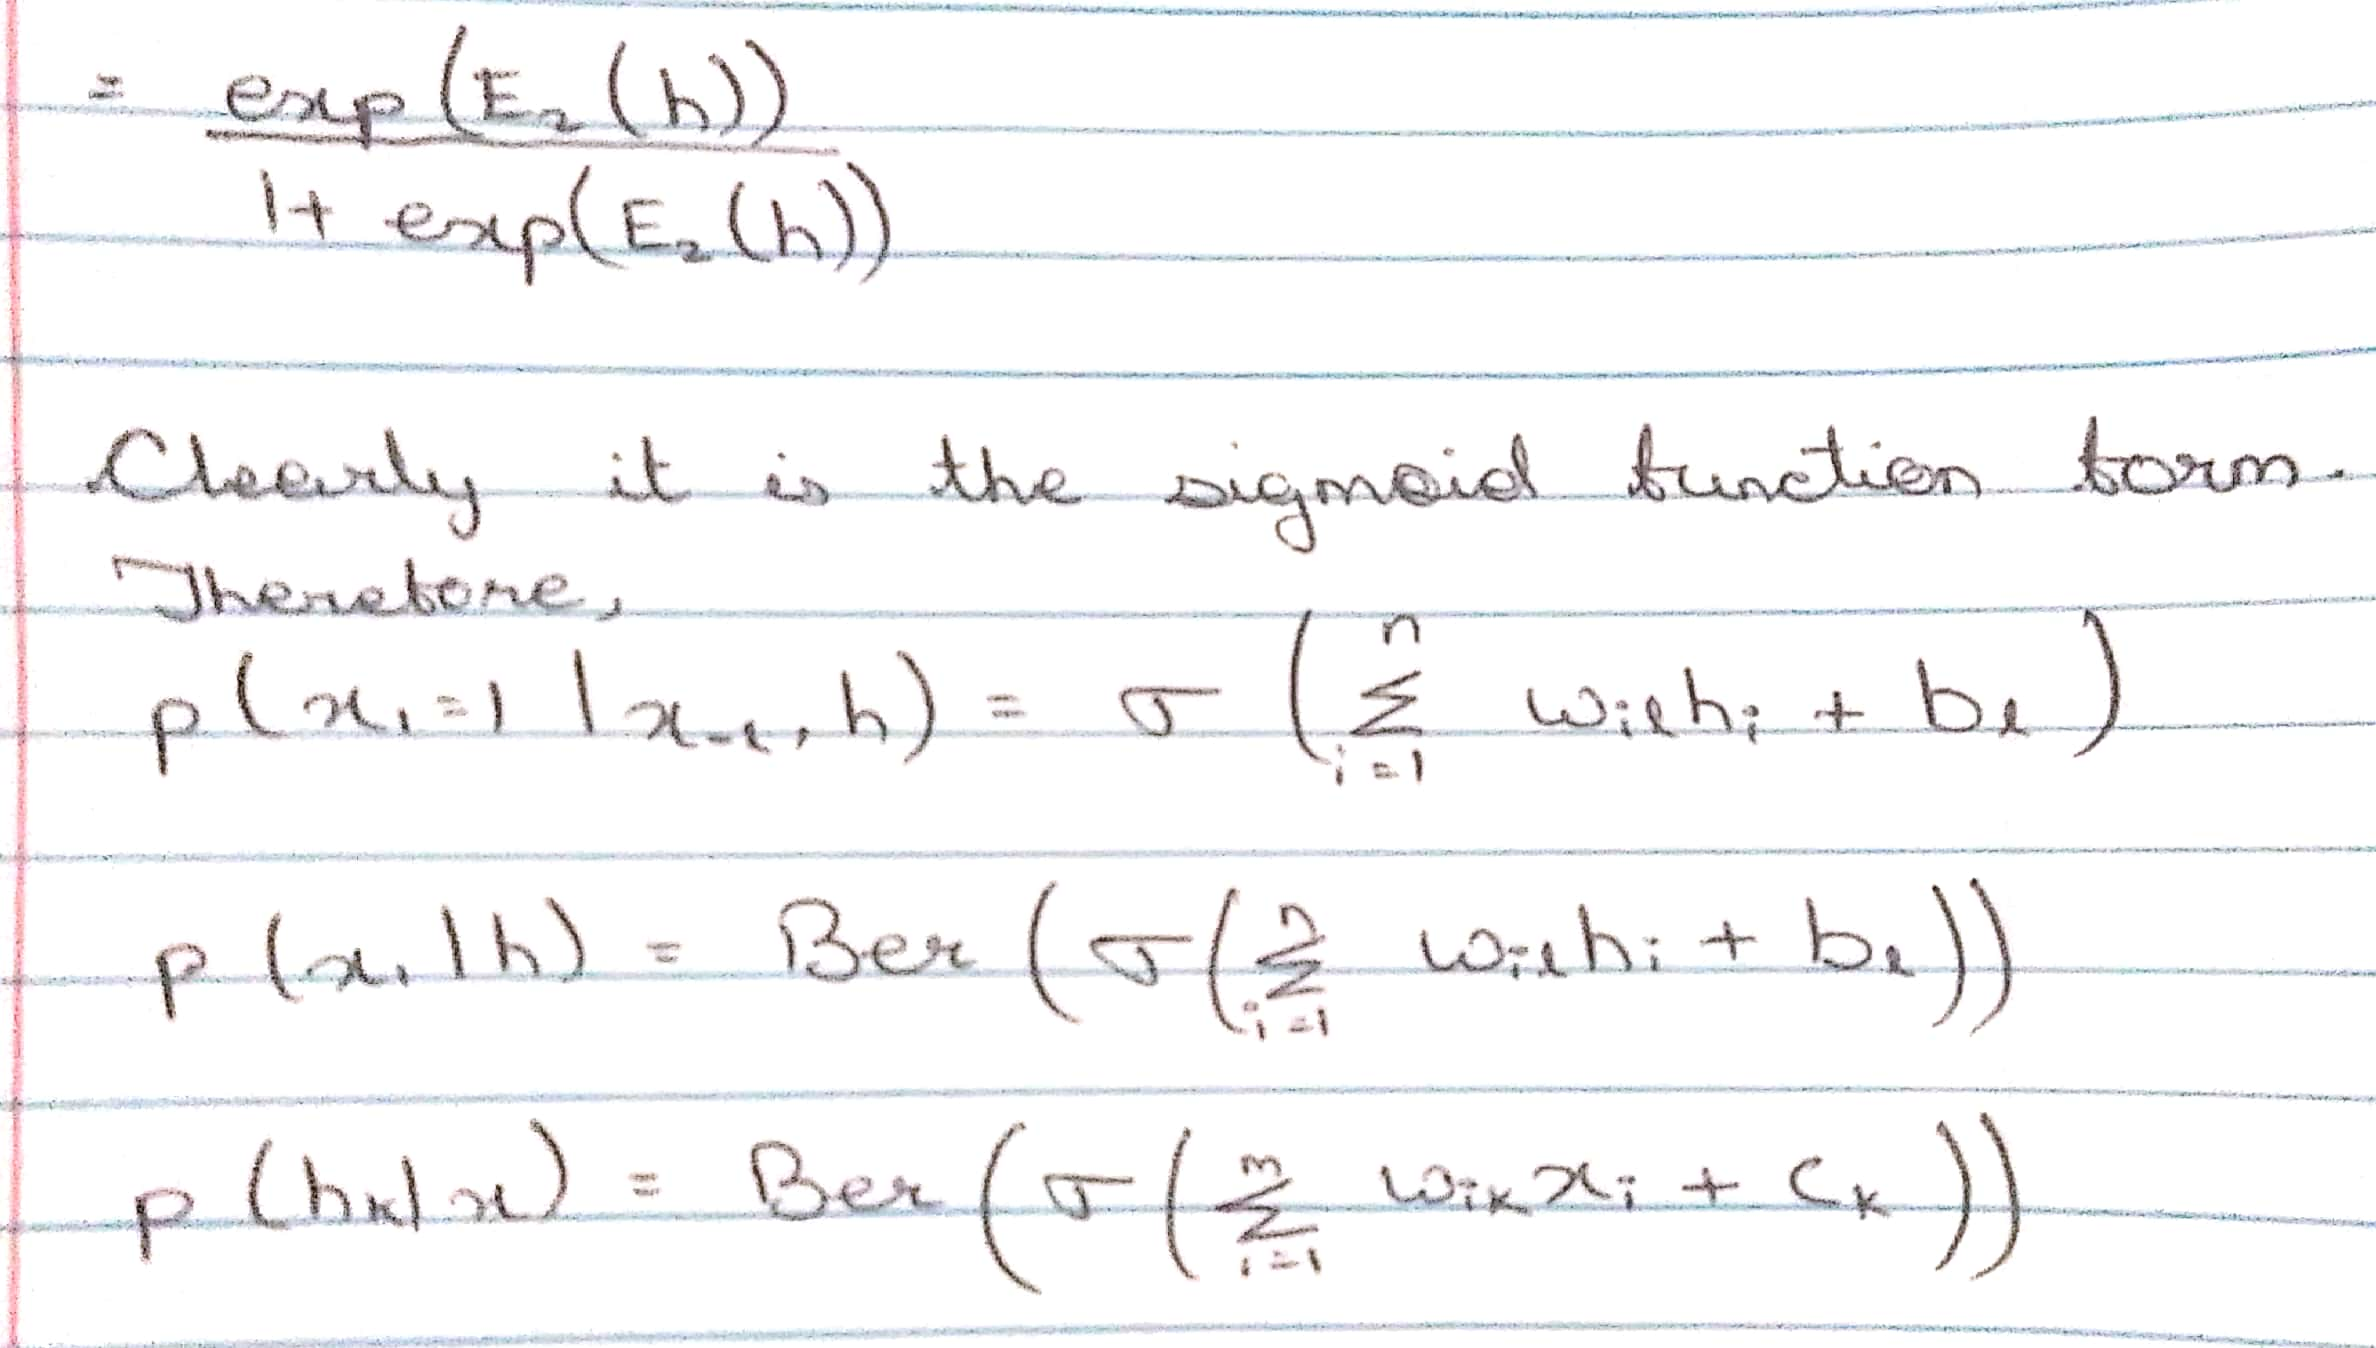

In [0]:
Image(filename = 'PS5-2.jpeg', width = 500, height = 500)

In [0]:
class RBM:
  
    def __init__(self, imgdata, n_components, learning_rate, batch_size, n_iter, random_state):
        self.imgdata = imgdata
        self.batch_size = batch_size
        self.x = 0
        self.rbm = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, batch_size=batch_size, n_iter=n_iter, random_state=random_state, verbose=1)
        
    def fit(self):
        self.x, _ = self.imgdata.train.next_batch(self.batch_size)
        self.rbm.fit(self.x)
        
    def samp_gibbs(self, m):
        for i in range(m):
            x_gibbs = self.rbm.gibbs(self.x)
            self.x = np.zeros_like(self.x)
            self.x[x_gibbs] = 1
        return self.x

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[BernoulliRBM] Iteration 1, pseudo-likelihood = -528.65, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -521.00, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -513.81, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -506.46, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -498.88, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -491.00, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -483.07, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -475.18, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -467.31, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -458.85, time = 0.01s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -450.46, time = 0.01s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -442.72, 

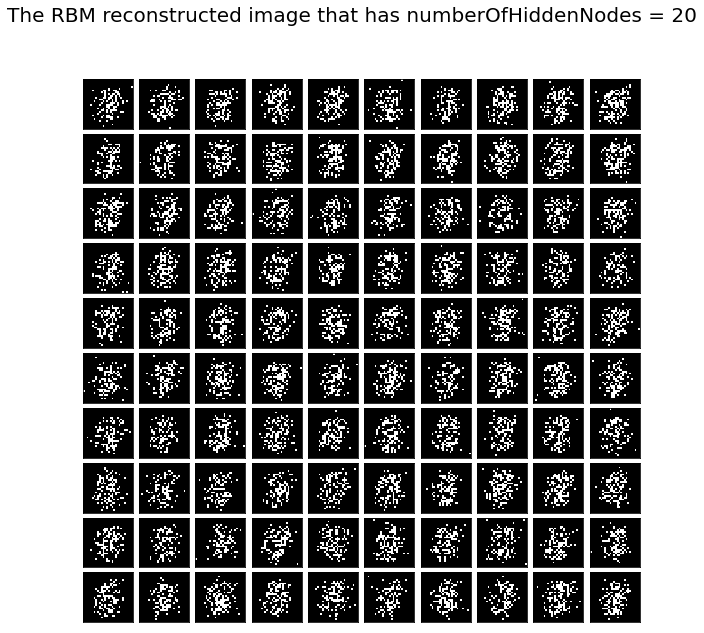

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[BernoulliRBM] Iteration 1, pseudo-likelihood = -481.49, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -458.49, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -438.67, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -421.30, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -405.43, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -394.00, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -387.61, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -382.81, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -372.55, time = 0.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -355.95, time = 0.02s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -328.60, time = 0.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -296.49, 

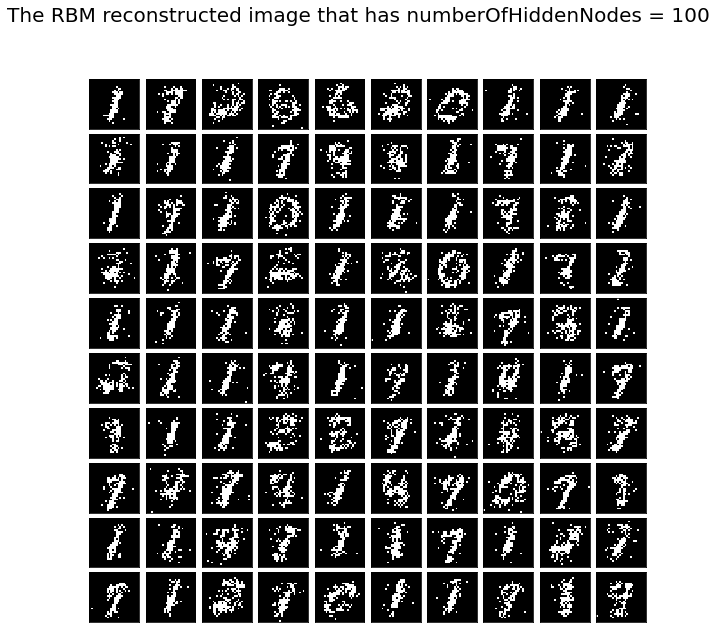

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[BernoulliRBM] Iteration 1, pseudo-likelihood = -306.56, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -267.27, time = 0.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -236.00, time = 0.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -217.29, time = 0.04s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -208.34, time = 0.04s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -200.24, time = 0.04s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -188.60, time = 0.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -180.74, time = 0.05s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -176.33, time = 0.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -173.01, time = 0.04s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -171.54, time = 0.05s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -169.19, 

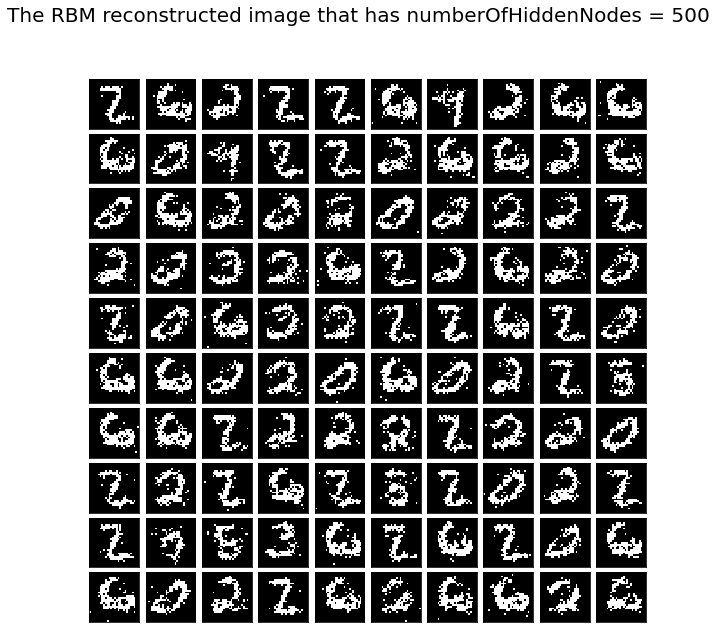

In [0]:
hidden_node_list = [20, 100, 500]
for hidden_nodes in hidden_node_list:
    rbm = RBM(imgdata=input_data.read_data_sets("data", one_hot=True), n_components=hidden_nodes, learning_rate=0.02, batch_size=100, n_iter=1000, random_state=0)
    rbm.fit()
    xg = rbm.samp_gibbs(1000)
    plt.figure(figsize=(10, 10))
    for i, com in enumerate(xg):
        plt.subplot(10, 10, i+1)
        plt.imshow(com.reshape((28, 28)), cmap="gray", interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    plt.suptitle("The RBM reconstructed image that has numberOfHiddenNodes = " + str(hidden_nodes), fontsize=20)
    plt.savefig("The RBM reconstructed image that has numberOfHiddenNodes = " + str(hidden_nodes) + ".png")
    plt.show()

#**Part 2**

In [0]:
class VAE:

    def __init__(self, images, code_units):
        self.images = images
        self.data = tf.placeholder(tf.float32, [None, 28, 28])
        self.code_units = code_units
        posterior = self.encode()
        self.sample_r = posterior.sample()
        prior = self.get_prior()        
        likelihood = self.decode(self.sample_r, [28, 28]).log_prob(self.data)        
        divergence = distributions.kl_divergence(posterior, prior)
        self.evidence = tf.reduce_mean(likelihood - divergence)
        self.optimize = tf.train.AdamOptimizer(0.001).minimize(-self.evidence)        
        self.samples = self.decode(prior.sample(10), [28, 28]).mean()

    def encode(self):
        with tf.variable_scope('encoder', reuse=tf.AUTO_REUSE):
            mean = tf.layers.dense(tf.layers.dense(tf.layers.dense(tf.layers.flatten(self.data), 784, tf.nn.relu), 256, tf.nn.relu), self.code_units)            
            variance = tf.layers.dense(tf.layers.dense(tf.layers.dense(tf.layers.flatten(self.data), 784, tf.nn.relu), 256, tf.nn.relu), self.code_units, tf.nn.softplus)      
            return distributions.MultivariateNormalDiag(mean, variance)

    def get_prior(self):
        mean = tf.zeros(self.code_units)
        variance = tf.ones(self.code_units)
        return distributions.MultivariateNormalDiag(mean, variance)

    @staticmethod
    def decode(code, data_shape):
        with tf.variable_scope('decoder', reuse=tf.AUTO_REUSE):
            logit = tf.reshape(tf.layers.dense(tf.layers.dense(tf.layers.dense(code, 256, tf.nn.relu), 784, tf.nn.relu), np.prod(data_shape)), [-1] + data_shape)  
            return distributions.Independent(distributions.Bernoulli(logit), 2)

    def gen_img(self, epochs):
        with tf.train.MonitoredSession() as s:
            for epoch in range(epochs):
                plt.clf()
                feed = {self.data:
                        self.images.test.images.reshape([-1, 28, 28])}                
                test_evidence, test_codes, test_samples = s.run([self.evidence, self.sample_r, self.samples], feed)                
                print('\nEpoch ' + str(epoch + 1) + ' for CodeUnits=' + str(self.code_units))
                print("Evidence lower bound:", test_evidence)
                for z in range(self.images.train.num_examples // 100):
                    feed = {self.data:
                            self.images.train.next_batch(100)[0].reshape([-1, 28, 28])}
                    s.run(self.optimize, feed)                
                fig, axes = plt.subplots(figsize=(20, 4), nrows=1, ncols=10, sharex=True, sharey=True)
                for ax, img in zip(axes.flatten(), test_samples[0:]):
                    ax.xaxis.set_visible(False)
                    ax.yaxis.set_visible(False)
                    ax.imshow(img.reshape((28, 28)), cmap="gray")
                fig.tight_layout(pad=0.1)
                fig.suptitle('Epoch ' + str(epoch+1), fontsize=20)
                plt.savefig('VAE for ' + str(self.code_units) + ' code units and ' + str(epoch + 1) + ' Epochs.png')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Epoch 1 for CodeUnits=2
Evidence lower bound: -544.19446

Epoch 2 for CodeUnits=2
Evidence lower bound: -162.66931

Epoch 3 for CodeUnits=2
Evidence lower bound: -155.48337

Epoch 4 for CodeUnits=2
Evidence lower bound: -152.33513

Epoch 5 for CodeUnits=2
Evidence lower bound: -149.62158

Epoch 6 for CodeUnits=2
Evidence lower bound: -148.05765

Epoch 7 for CodeUnits=2
Evidence lower bound: -146.28108

Epoch 8 for CodeUn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Epoch 1 for CodeUnits=8
Evidence lower bound: -545.9781


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Epoch 2 for CodeUnits=8
Evidence lower bound: -124.96735

Epoch 3 for CodeUnits=8
Evidence lower bound: -117.2702

Epoch 4 for CodeUnits=8
Evidence lower bound: -114.189224

Epoch 5 for CodeUnits=8
Evidence lower bound: -111.74614

Epoch 6 for CodeUnits=8
Evidence lower bound: -110.44177

Epoch 7 for CodeUnits=8
Evidence lower bound: -109.44295

Epoch 8 for CodeUnits=8
Evidence lower bound: -108.325424

Epoch 9 for CodeUnits=8
Evidence lower bound: -107.70598

Epoch 10 for CodeUnits=8
Evidence lower bound: -107.1392

Epoch 11 for CodeUnits=8
Evidence lower bound: -106.79985

Epoch 12 for CodeUnits=8
Evidence lower bound: -106.31295

Epoch 13 for CodeUnits=8
Evidence lower bound: -105.91551

Epoch 14 for CodeUnits=8
Evidence lower bound: -105.5513

Epoch 15 for CodeUnits=8
Evidence lower bound: -105.24495

Epoch 16 for CodeUnits=8
Evidence lower bound: -105.06677

Epoch 17 for CodeUnits=8
Evidence lower bound: -105.08602

Epoch 18 for CodeUnits=8
Evidence lower bound: -104.82016

Epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Epoch 2 for CodeUnits=16
Evidence lower bound: -119.77731

Epoch 3 for CodeUnits=16
Evidence lower bound: -111.53955

Epoch 4 for CodeUnits=16
Evidence lower bound: -108.1644

Epoch 5 for CodeUnits=16
Evidence lower bound: -105.92905

Epoch 6 for CodeUnits=16
Evidence lower bound: -104.577034

Epoch 7 for CodeUnits=16
Evidence lower bound: -104.4046

Epoch 8 for CodeUnits=16
Evidence lower bound: -103.30722

Epoch 9 for CodeUnits=16
Evidence lower bound: -102.349365

Epoch 10 for CodeUnits=16
Evidence lower bound: -102.25

Epoch 11 for CodeUnits=16
Evidence lower bound: -101.905464

Epoch 12 for CodeUnits=16
Evidence lower bound: -101.65885

Epoch 13 for CodeUnits=16
Evidence lower bound: -100.993866

Epoch 14 for CodeUnits=16
Evidence lower bound: -100.77343

Epoch 15 for CodeUnits=16
Evidence lower bound: -100.46699

Epoch 16 for CodeUnits=16
Evidence lower bound: -100.26242

Epoch 17 for CodeUnits=16
Evidence lower bound: -100.09379

Epoch 18 for CodeUnits=16
Evidence lower bound: 

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

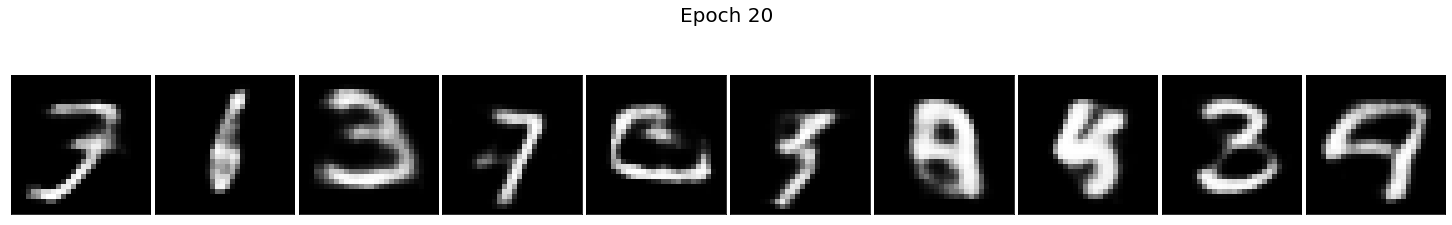

In [0]:
code_units = [2, 8, 16]
for code_unit in code_units:
    tf.reset_default_graph()
    vae = VAE(input_data.read_data_sets("data", one_hot=True), code_unit)
    vae.gen_img(epochs=20)

#**Part 3**

In [0]:
class VAECNN:

    def __init__(self, images, in_shape, out_shape):
        self.images = images
        inputx, inputy = in_shape
        outputx, outputy = out_shape
        self.inputTensor = tf.placeholder(tf.float32, [None, inputx, inputy, 1])
        self.outputTensor = tf.placeholder(tf.float32, [None, outputx, outputy, 1])
        self.encoder_out = 0
        self.decoder_out = 0
        self.logits = 0
        self.cost = 0
        self.optimizer = 0
    
    def encode(self):
        self.encoder_out = tf.layers.conv2d(self.inputTensor, 64, kernel_size=(3,3), padding='same', activation=tf.nn.relu)  
        self.encoder_out = tf.layers.max_pooling2d(self.encoder_out, pool_size=(2,2), strides=(2,2), padding='same')    
        self.encoder_out = tf.layers.conv2d(self.encoder_out, 32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)      
        self.encoder_out = tf.layers.max_pooling2d(self.encoder_out, pool_size=(2,2), strides=(2,2), padding='same')        
        self.encoder_out = tf.layers.conv2d(self.encoder_out, 16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
        self.encoder_out = tf.layers.max_pooling2d(self.encoder_out, pool_size=(2,2), strides=(2,2), padding='same')

        
    def decode(self):
        self.decoder_out = tf.image.resize_nearest_neighbor(self.encoder_out, (7,7))  
        self.decoder_out = tf.layers.conv2d(self.decoder_out, 16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)        
        self.decoder_out = tf.image.resize_nearest_neighbor(self.decoder_out, (14,14))       
        self.decoder_out = tf.layers.conv2d(self.decoder_out, 32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)        
        self.decoder_out = tf.image.resize_nearest_neighbor(self.decoder_out, (28,28))        
        self.decoder_out = tf.layers.conv2d(self.decoder_out, 64, kernel_size=(3,3), padding='same', activation=tf.nn.relu)        
        self.logits = tf.layers.conv2d(self.decoder_out, 1, kernel_size=(3,3), padding='same', activation=None)        
        self.decoder_out = tf.nn.sigmoid(self.logits)
  
    def compile2(self):
        loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=self.logits, labels=self.outputTensor)
        self.cost = tf.reduce_mean(loss)
        self.optimizer = tf.train.AdamOptimizer(0.001).minimize(self.cost)
    
    def train(self, epochs, batch_size):
        s = tf.Session()
        s.run(tf.global_variables_initializer())
        np.random.shuffle(self.images.test.images)
        test_images = self.images.test.images[:10]
        for epoch in range(epochs):
            print("\nEpoch " + str(epoch))
            for z in tqdm(range(self.images.train.num_examples//batch_size), total=self.images.train.num_examples//batch_size):
                batch = self.images.train.next_batch(batch_size)
                images = batch[0].reshape((-1, 28, 28, 1))
                batch_cost, _ = s.run([self.cost, self.optimizer], feed_dict={self.inputTensor: images, self.outputTensor: images})
            print("Training loss at Epoch " + str(epoch+1) + " is " + str(round(batch_cost, 4)))
            modeled_images = s.run(self.decoder_out, feed_dict={self.inputTensor: test_images.reshape((10, 28, 28, 1))})
            self.draw(test_images, modeled_images, epoch)
            
    @staticmethod
    def draw(original_images, modeled_images, epoch):
        plt.clf()
        f, axarr = plt.subplots(2, 10, sharex=True, sharey=True, figsize=(20,5))
        for images, row in zip([original_images, modeled_images], axarr):
            for image, ax in zip(images, row):
                ax.imshow(image.reshape((28,28)), cmap="gray")
                ax.xaxis.set_visible(False)
                ax.yaxis.set_visible(False)                
        f.tight_layout(pad=0.1)
        plt.savefig("VAE CNN after " + str(epoch+1) + " epochs.png")
        plt.show()

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 0


100%|██████████| 550/550 [05:31<00:00,  1.66it/s]


Training loss at Epoch 1 is 0.0968


<Figure size 432x288 with 0 Axes>

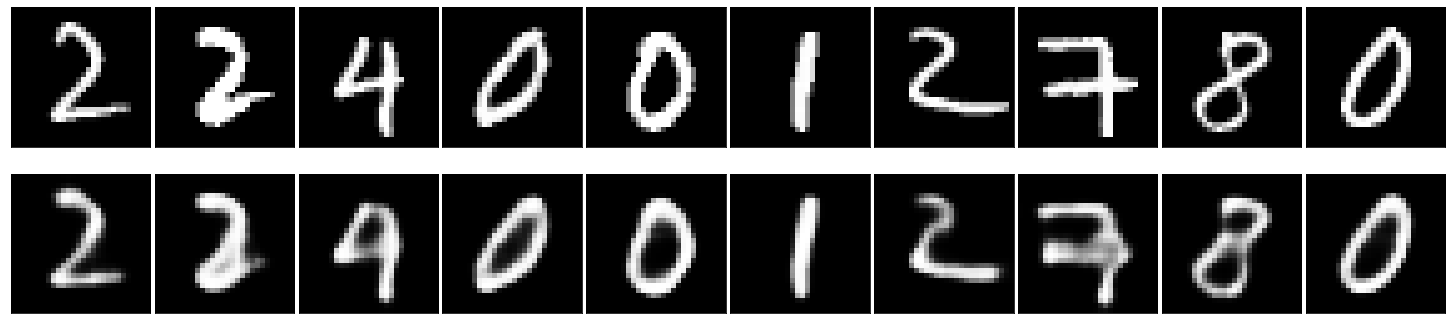

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 1


100%|██████████| 550/550 [05:31<00:00,  1.66it/s]


Training loss at Epoch 2 is 0.0926


<Figure size 432x288 with 0 Axes>

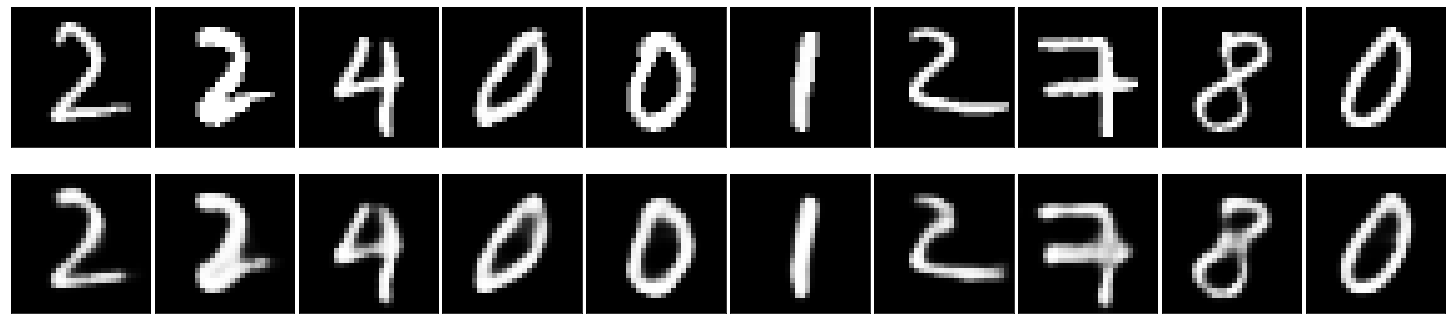

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 2


100%|██████████| 550/550 [05:33<00:00,  1.65it/s]


Training loss at Epoch 3 is 0.0917


<Figure size 432x288 with 0 Axes>

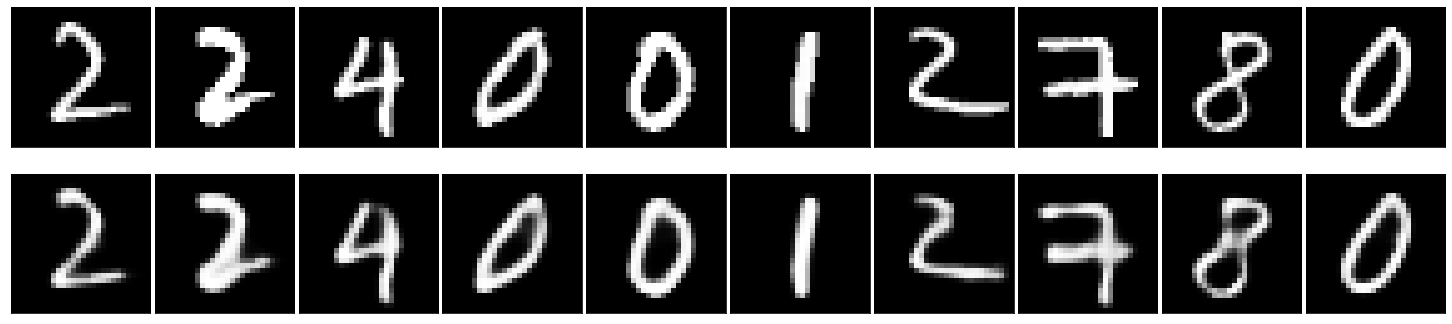

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 3


100%|██████████| 550/550 [05:40<00:00,  1.62it/s]


Training loss at Epoch 4 is 0.0839


<Figure size 432x288 with 0 Axes>

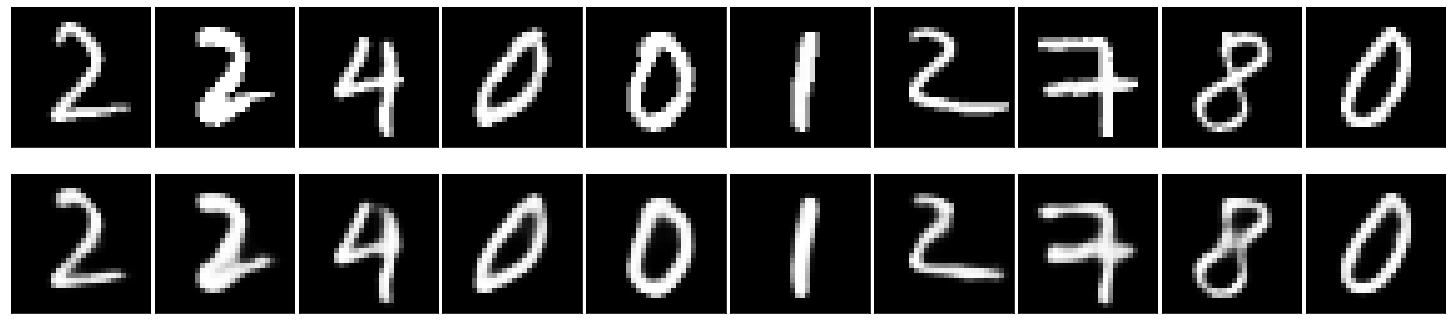

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 4


100%|██████████| 550/550 [05:35<00:00,  1.64it/s]


Training loss at Epoch 5 is 0.0809


<Figure size 432x288 with 0 Axes>

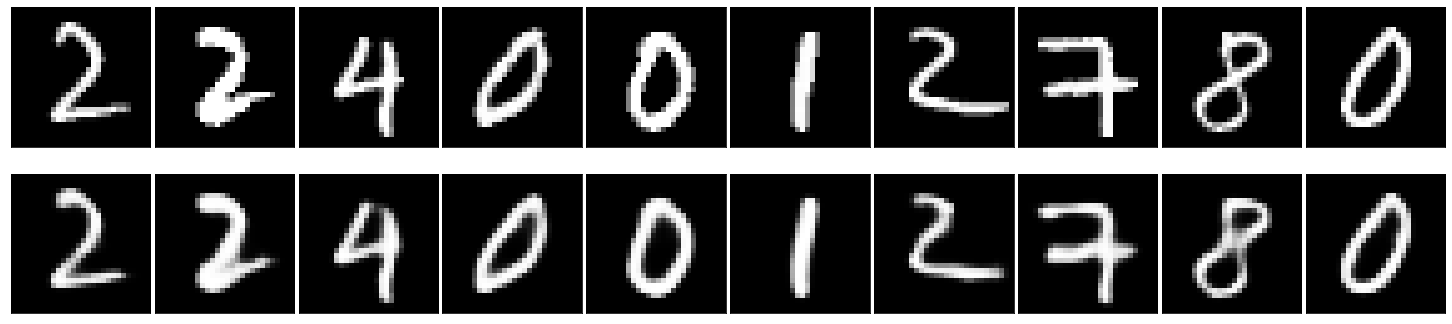

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 5


100%|██████████| 550/550 [05:34<00:00,  1.64it/s]


Training loss at Epoch 6 is 0.0812


<Figure size 432x288 with 0 Axes>

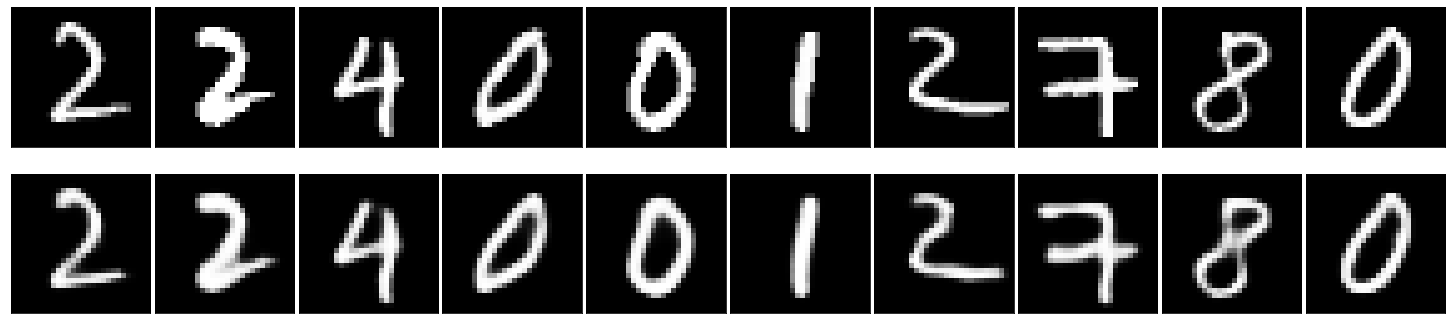

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 6


100%|██████████| 550/550 [05:33<00:00,  1.65it/s]


Training loss at Epoch 7 is 0.0778


<Figure size 432x288 with 0 Axes>

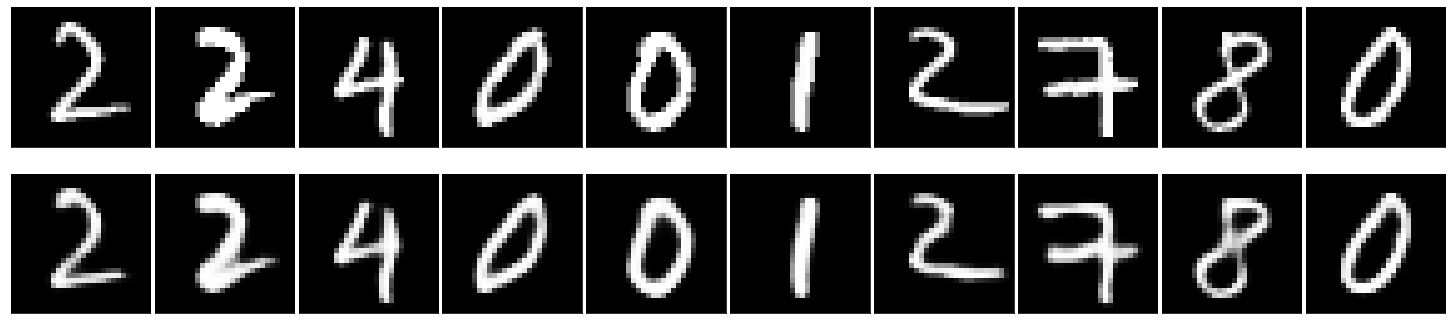

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 7


100%|██████████| 550/550 [05:33<00:00,  1.65it/s]


Training loss at Epoch 8 is 0.0802


<Figure size 432x288 with 0 Axes>

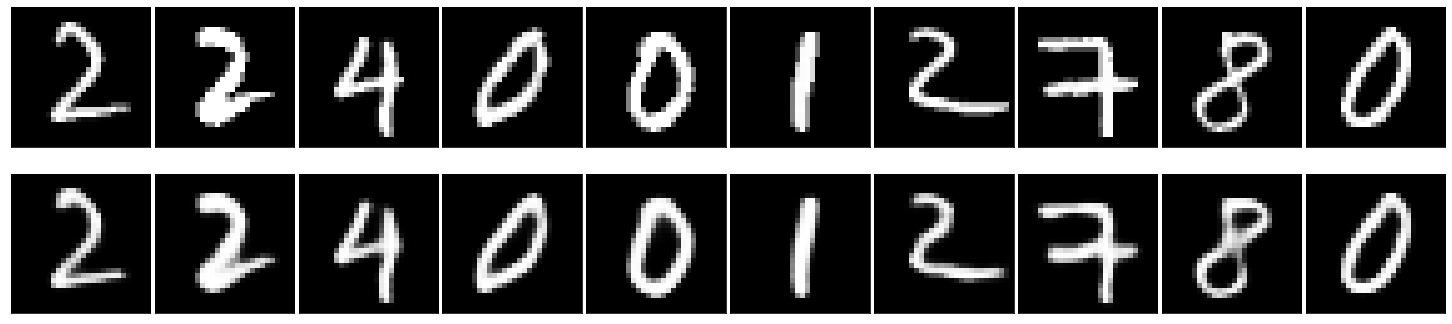

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 8


100%|██████████| 550/550 [05:35<00:00,  1.64it/s]


Training loss at Epoch 9 is 0.0776


<Figure size 432x288 with 0 Axes>

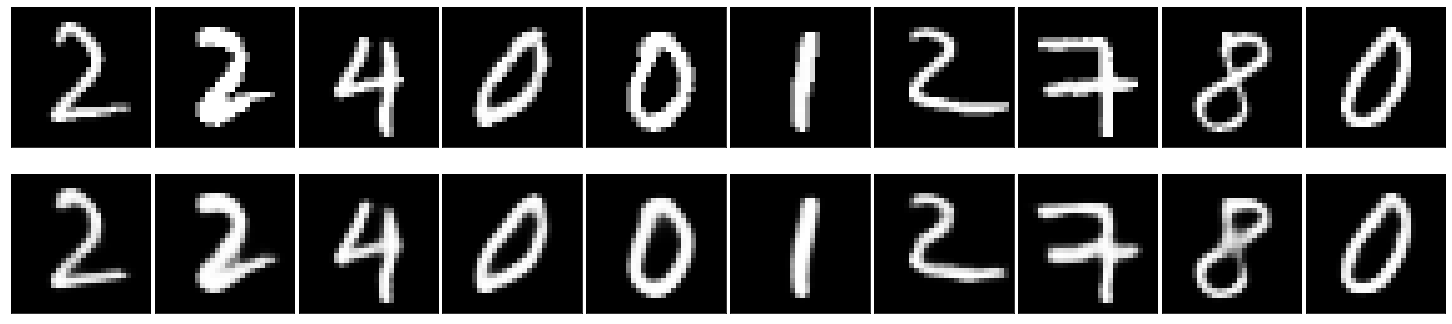

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 9


100%|██████████| 550/550 [05:33<00:00,  1.65it/s]


Training loss at Epoch 10 is 0.0748


<Figure size 432x288 with 0 Axes>

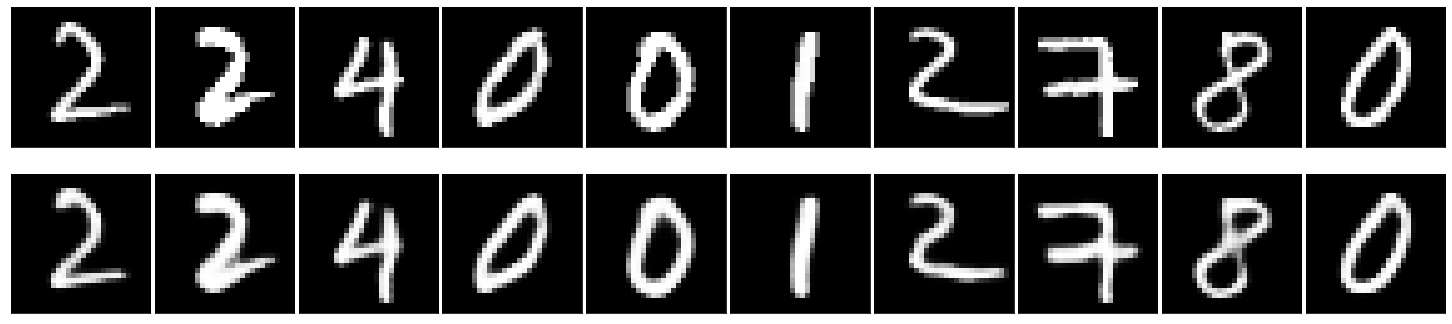

In [0]:
vaecnn = VAECNN(input_data.read_data_sets("data", one_hot=True), (28,28), (28,28))
vaecnn.encode()
vaecnn.decode()
vaecnn.compile2()
vaecnn.train(epochs=10, batch_size=100)

#References

https://medium.com/datatype/restricted-boltzmann-machine-a-complete-analysis-part-3-contrastive-divergence-algorithm-3d06bbebb10c

https://keras.io/examples/variational_autoencoder/